<a href="https://colab.research.google.com/github/Gadha-Viswanath/ML-Assignment--Clustering-Algorithms/blob/main/ML_Assignment_5_Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clustering Algorithm

Objective: The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset. Iris dataset is used here

# 1.Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the iris dataset
iris_data = load_iris()

In [3]:
#Converting to a dataframe
iris_df = pd.DataFrame(data=iris_data.data,columns = iris_data.feature_names)

In [4]:
#adding species column for reference
iris_df['species'] = iris_data.target

In [5]:
#drop the species column
iris_df.drop(columns=['species'],inplace=True)

In [6]:
#displaying the dataset
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
#Checking null values
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


No Missing values are present in the data

In [9]:
#Checking for duplicated values
iris_df.duplicated().sum()

1

One duplicate value is present. Lets drop it

In [10]:
iris_df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
#Checking skewness of data
iris_df.skew()

,0
sepal length (cm),0.314911
sepal width (cm),0.318966
petal length (cm),-0.274884
petal width (cm),-0.102967


In [12]:
#Finding Outliers using IQR method
outlier_indices = [] #storing indices of outliers
for column in iris_df.select_dtypes(include=['float64','int64']).columns:
    Q1 = iris_df[column].quantile(0.25)
    Q3 = iris_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [14]:
#Finding Outliers using IQR method
outlier_indices = [] #storing indices of outliers
for column in iris_df.select_dtypes(include=['float64','int64']).columns:
    Q1 = iris_df[column].quantile(0.25)
    Q3 = iris_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Displaying ouliers
    outliers = iris_df[(iris_df[column]<lower_bound) | (iris_df[column]>upper_bound)]
    if outliers.empty:
        print("No outliers found in column:",column)
    else:
        print("Outliers in column",column ,":\n",outliers)
    print("Extracted outlier indices for column",column,":",outliers.index.tolist())
    outlier_indices.extend(outliers.index.tolist())
    print("Outlier indices after addfing from column",column,":",outlier_indices)
print("before removing duplictes:",outlier_indices)
outlier_indices = list(set(outlier_indices))
print("final outlier indices:",outlier_indices)

No outliers found in column: sepal length (cm)
Extracted outlier indices for column sepal length (cm) : []
Outlier indices after addfing from column sepal length (cm) : []
Outliers in column sepal width (cm) :
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0
Extracted outlier indices for column sepal width (cm) : [15, 32, 33, 60]
Outlier indices after addfing from column sepal width (cm) : [15, 32, 33, 60]
No outliers found in column: petal length (cm)
Extracted outlier indices for column petal length (cm) : []
Outlier indices after addfing from column petal length (cm) : [15, 32, 33, 60]
No outliers found in column: petal width (cm)
Extracted outlier ind

Outliers are present in sepal width column. So removing the outliers from sepal width column

In [15]:
#Removing outliers
# Print debug info
print("Outlier indices before removal:", outlier_indices)
print("Dataset indices:", list(iris_df.index))
print("Type of outlier indices:", [type(i) for i in outlier_indices])

# Convert to standard integer format
outlier_indices = list(map(int, outlier_indices))
print("Converted outlier indices:", outlier_indices)

# Check if indices exist in dataset
if set(outlier_indices).issubset(set(iris_df.index)):
    # Remove outliers
    iris_cleaned = iris_df.drop(outlier_indices, axis=0).reset_index(drop=True)
    print("Outliers Removed")
else:
    print("Error: Outlier indices do not match dataset index!")

Outlier indices before removal: [32, 33, 60, 15]
Dataset indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Type of outlier indices: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]
Converted outlier indices: [32, 33, 60, 15]
Outliers Removed


In [16]:
# Display dataset shape before and after outlier removal
print("Original dataset shape:", iris_df.shape)
print("Cleaned dataset shape:", iris_cleaned.shape)

Original dataset shape: (150, 4)
Cleaned dataset shape: (146, 4)


In [17]:
#Checking skewness after outlier removal
iris_cleaned.skew()

,0
sepal length (cm),0.278417
sepal width (cm),0.131562
petal length (cm),-0.324099
petal width (cm),-0.146606


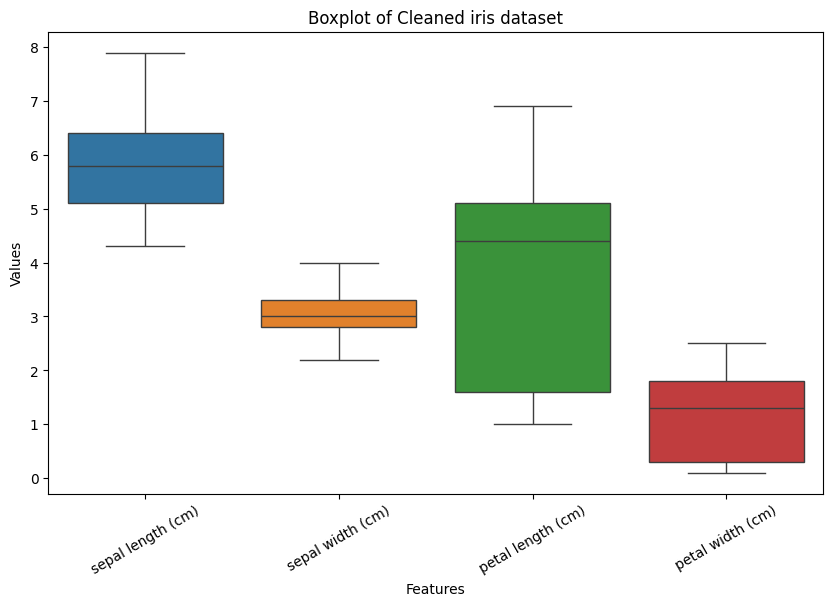

In [18]:
#Plotting the cleaned data
plt.figure(figsize=(10,6))
sns.boxplot(data = iris_cleaned)
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation = 30)
plt.title("Boxplot of Cleaned iris dataset")
plt.show()

In [19]:
#Implementing scaling
from sklearn.preprocessing import StandardScaler
#loading the cleaned dataset
X = iris_cleaned
#Standardiztion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

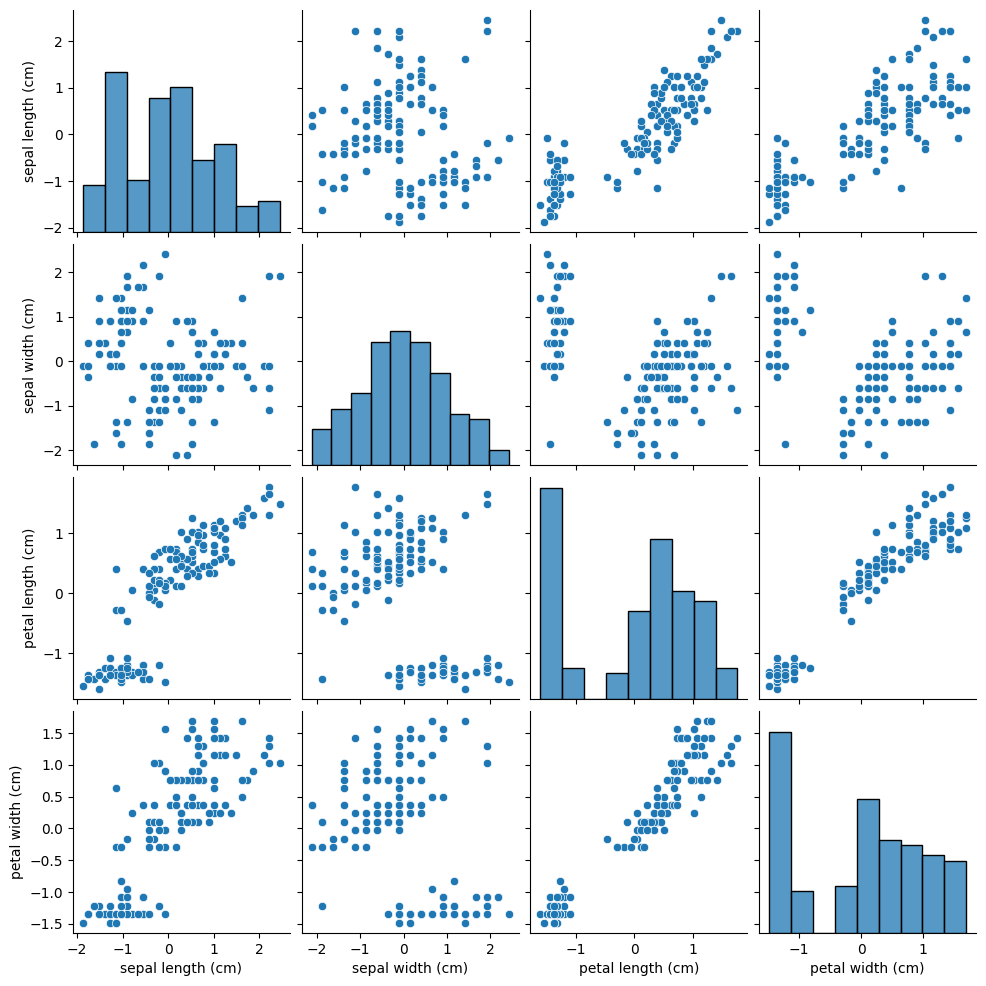

In [20]:
#drawing a scatterplot of scaled data
sns.pairplot(X_scaled_df)
plt.show()

## 2.Clustering Algorithm Implementation

A. KMeans Clustering

KMeans Clustering: KMeans is a centroid-based clustering algorithm that partitions the data into k clusters. It iteratively assigns points to clusters based on the shortest Euclidean distance to the cluster centroid, then updates centroids by calculating the mean of points in each cluster.

Why it's suitable: Iris data consists of numeric features, which makes it a good candidate for centroid-based algorithms like KMeans.

In [21]:
#importing kmeans
from sklearn.cluster import KMeans
import numpy as np
#Applying K-Means clustering
#Using elbow method to choose optimal no.of clusters
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [22]:
kmeans.inertia_

47.08505647814036

In [23]:
kmeans.labels_

array([2, 7, 7, 7, 2, 6, 2, 2, 7, 7, 6, 2, 7, 7, 6, 6, 2, 6, 6, 2, 6, 2,
       2, 2, 7, 2, 2, 2, 7, 7, 2, 7, 7, 2, 2, 7, 2, 2, 0, 7, 2, 6, 7, 6,
       7, 6, 2, 5, 5, 5, 0, 5, 4, 5, 0, 5, 4, 4, 0, 4, 4, 5, 4, 4, 3, 0,
       5, 4, 3, 4, 5, 5, 5, 5, 4, 0, 0, 0, 4, 3, 4, 5, 5, 3, 4, 0, 4, 5,
       4, 0, 4, 4, 4, 4, 0, 4, 1, 3, 9, 5, 1, 9, 0, 9, 3, 8, 1, 3, 1, 3,
       3, 1, 5, 8, 9, 3, 1, 3, 9, 3, 1, 9, 3, 5, 3, 9, 9, 8, 3, 3, 3, 9,
       1, 5, 5, 1, 1, 1, 3, 1, 1, 1, 3, 5, 1, 5], dtype=int32)

In [24]:
K

range(1, 11)

In [25]:
inertia

[584.0,
 217.49930248037322,
 134.3458316828537,
 109.76739914091097,
 88.9659326905553,
 78.70359037714518,
 68.02970763940394,
 60.942083736668785,
 52.286635706055975,
 47.08505647814036]

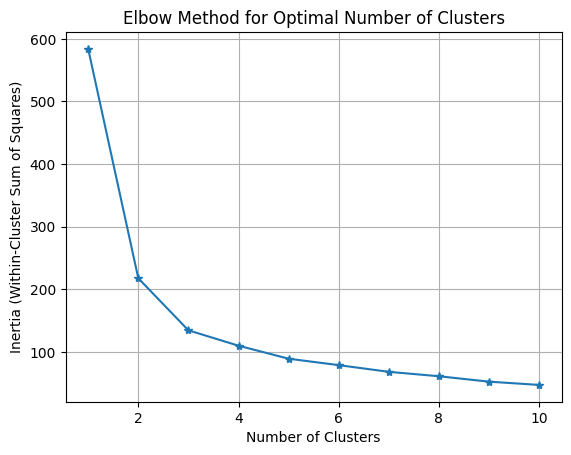

In [26]:
# Plot the Elbow curve
plt.plot(K, inertia,marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

From the "elbow" in the graph,inertia stops decreasing sharply at 3, so we can consider optimal no.of clusters as 3

In [27]:
#Applying k-means clustering with optimal clusters = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
clusters = kmeans.fit_predict(X_scaled)
#Adding cluster labels to the dataset
X_scaled_df["Cluster"]=clusters
X_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,-0.910515,1.159151,-1.373764,-1.348525,1
1,-1.151122,-0.101922,-1.373764,-1.348525,1
2,-1.391729,0.402507,-1.430841,-1.348525,1
3,-1.512032,0.150292,-1.316687,-1.348525,1
4,-1.030819,1.411365,-1.373764,-1.348525,1
...,...,...,...,...,...
141,1.014339,-0.101922,0.795172,1.426359,0
142,0.533125,-1.362995,0.681018,0.897810,2
143,0.773732,-0.101922,0.795172,1.029947,0
144,0.412822,0.906936,0.909327,1.426359,0


In [28]:
# Profile each cluster
cluster_profile = X_scaled_df.groupby('Cluster').mean()
cluster_profile

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster,,,,
0,1.143036,0.220678,0.988970,1.023801
1,-1.058975,0.847907,-1.338546,-1.286674
2,0.011095,-0.881085,0.364035,0.293753


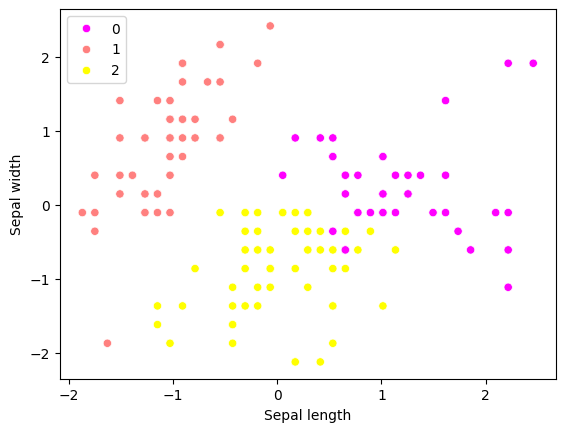

In [29]:
#Plotting the clusters in a scatter plot
sns.scatterplot(x=X_scaled_df["sepal length (cm)"],
               y=X_scaled_df["sepal width (cm)"],
               hue = X_scaled_df["Cluster"],
               palette="spring")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

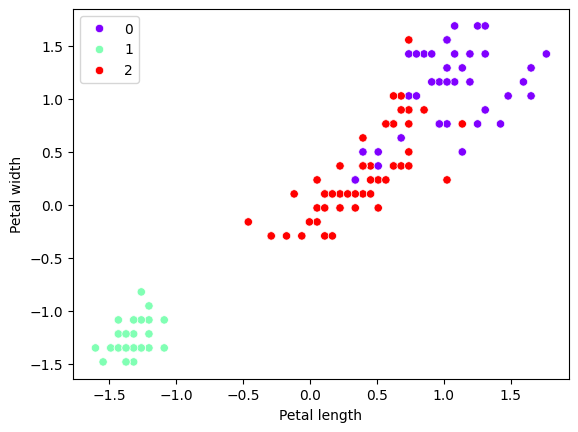

In [30]:
sns.scatterplot(x=X_scaled_df["petal length (cm)"],
               y=X_scaled_df["petal width (cm)"],
               hue = X_scaled_df["Cluster"],
               palette="rainbow")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

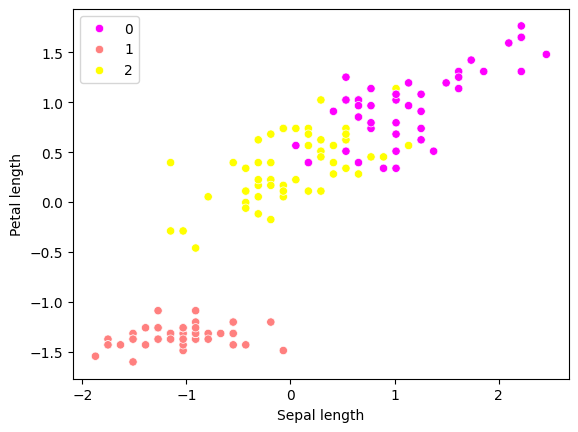

In [31]:
#Plotting the clusters in a scatter plot
sns.scatterplot(x=X_scaled_df["sepal length (cm)"],
               y=X_scaled_df["petal length (cm)"],
               hue = X_scaled_df["Cluster"],
               palette="spring")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()
plt.show()

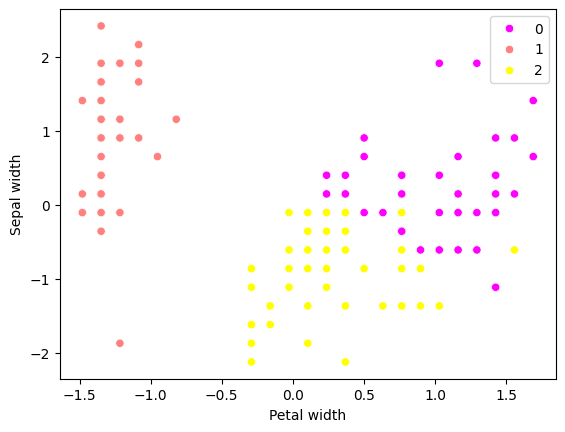

In [32]:
#Plotting the clusters in a scatter plot
sns.scatterplot(x=X_scaled_df["petal width (cm)"],
               y=X_scaled_df["sepal width (cm)"],
               hue = X_scaled_df["Cluster"],
               palette="spring")
plt.xlabel("Petal width")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

Here, the first plot - sepal based clustering shows overlapping clusters, indicating that sepals alone are not best for species seperation Wherein second plot - petal based clustering shows better seperated clusters indicating that petal length and width are more significant features for classification in the iris dataset. From the 4 plots visulaized above, petal related features tend to provide better seperation.

In [33]:
#Evaluating kmeans clustering
#Applying Silhouette Score to Measure how well the clusters are separated.
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled,labels)
silhouette_avg

0.46704048699050305

The silhouette score suggests that the clusters are moderately well-formed, but there is some overlap

B. Hierarchical Clustering

Hierarchical Clustering: Hierarchical clustering creates a tree-like structure of clusters by either merging smaller clusters into larger ones (agglomerative) or splitting larger clusters into smaller ones (divisive). Agglomerative clustering is the most commonly used.

Why it's suitable: Hierarchical clustering is particularly useful when the number of clusters is unknown and we want to visualize the relationships between clusters.

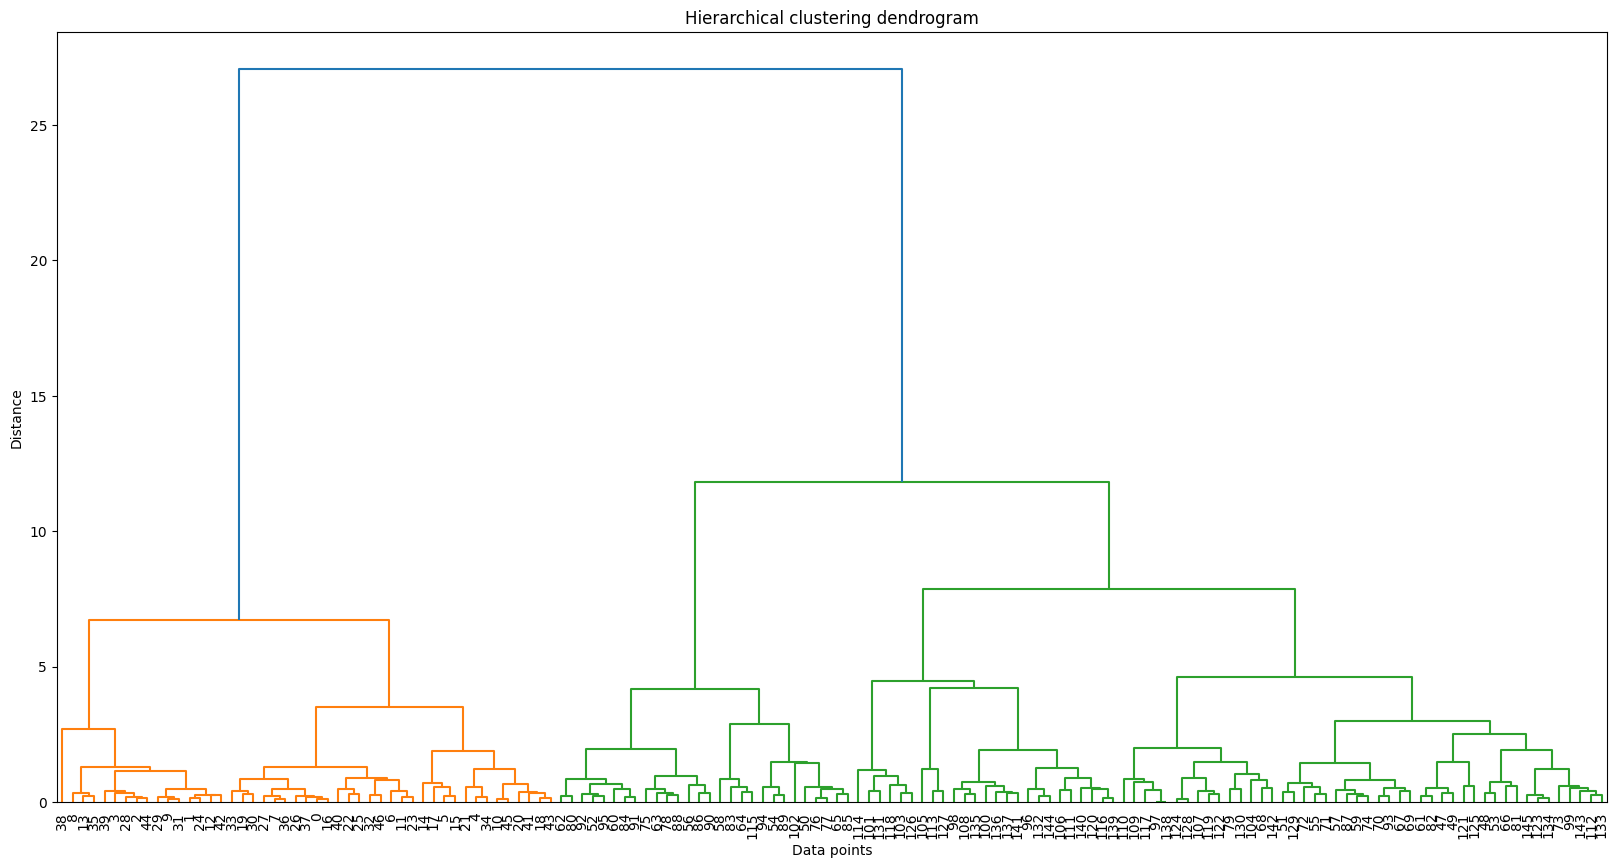

In [34]:
#importing necessary libraries
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
#Hierarchical clustering
Z = linkage(X_scaled,method='ward')
#plot the dendogram
plt.figure(figsize=(20,10))
labels = [str(i) for i in range(len(X))]
dendrogram(Z,labels=labels,leaf_rotation = 90,
         leaf_font_size=10)
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

The dendrogram shows 3 main clusters in the data. Even though the outliers are removed from the data during pre processing stage, some possible anomalies might still exist.

In [35]:
#Applying silhouette score method for Heirarchical clustering
Z = linkage(X_scaled,method='average')
num_clusters = 3
labels = fcluster(Z,num_clusters,criterion='maxclust')
sil_score = silhouette_score(X_scaled,labels)
sil_score

0.49034658224012806

The silhouette score 0.4903 suggests a moderate clustering